In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df = pd.read_csv('uber-raw-data-sep14.csv')

In [3]:
df.head(5) #to show top 5 rows

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
df.info() # to show the full details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [5]:
#statistical information of the dataset
df.describe(include = 'all')

,Date/Time,Lat,Lon,Base
count,1028136,1.028136e+06,1.028136e+06,1028136
unique,42907,NaN,NaN,5
top,9/13/2014 18:44:00,NaN,NaN,B02617
freq,82,NaN,NaN,377695
mean,NaN,4.073922e+01,-7.397182e+01,NaN
std,NaN,4.082861e-02,5.831413e-02,NaN
min,NaN,3.998970e+01,-7.477360e+01,NaN
25%,NaN,4.072040e+01,-7.399620e+01,NaN
50%,NaN,4.074180e+01,-7.398310e+01,NaN
75%,NaN,4.076120e+01,-7.396280e+01,NaN


In [6]:
#to check for missing values
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

This indicates that there are no missing values

In [7]:
#to check for their datatypes
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [8]:
#to check the shape of the dataset
df.shape

(1028136, 4)

In [9]:
#convert the Date/Time column to datetime and split the column
df['Month'] = pd.to_datetime(df['Date/Time']).dt.month
df['Weekday'] = pd.to_datetime(df['Date/Time']).dt.weekday
df['Day'] = pd.to_datetime(df['Date/Time']).dt.day
df['Hour'] = pd.to_datetime(df['Date/Time']).dt.hour

In [10]:
df['Year'] = pd.to_datetime(df['Date/Time']).dt.year

In [11]:
df.tail(5) # to check the last five rows

,Date/Time,Lat,Lon,Base,Month,Weekday,Day,Hour,Year
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,9,1,30,22,2014
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,9,1,30,22,2014
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,9,1,30,22,2014
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,9,1,30,22,2014
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764,9,1,30,22,2014


In [12]:
df['Year'].value_counts()
#The dataset is for 2014

2014    1028136
Name: Year, dtype: int64

In [13]:
print(df['Month'].mode())
print(df['Month'].unique())

0    9
Name: Month, dtype: int64
[9]


In [14]:
df['Month'].value_counts()

9    1028136
Name: Month, dtype: int64

This shows that the dataset is for September 2014

In [15]:
df['Weekday'].value_counts()
#since work starts on Monday pandas datetime takes Monday as 0 and Sunday as 6. Tuesday has the highest number of rides.

1    163230
5    162057
4    160380
3    153276
0    137288
2    135373
6    116532
Name: Weekday, dtype: int64

In [16]:
df['Day'].mode()
# 13th of September, 2014 has the hghest number of trips

0    13
Name: Day, dtype: int64

In [17]:
df['Hour'].value_counts().sort_values()

2     10702
3     10789
4     12675
1     16107
5     20262
0     24133
6     33307
23    36568
10    37634
9     38542
11    38821
12    39193
7     43314
8     44477
13    45042
22    51817
14    52643
21    60606
15    61219
20    63988
16    68224
19    69660
17    73373
18    75040
Name: Hour, dtype: int64

In [18]:
df['Base'].value_counts()

B02617    377695
B02598    240600
B02682    197138
B02764    178333
B02512     34370
Name: Base, dtype: int64

BO2617 base has the highest number of trips

# Using Matplotlib for Visualisation

Text(0, 0.5, 'Count of rides')

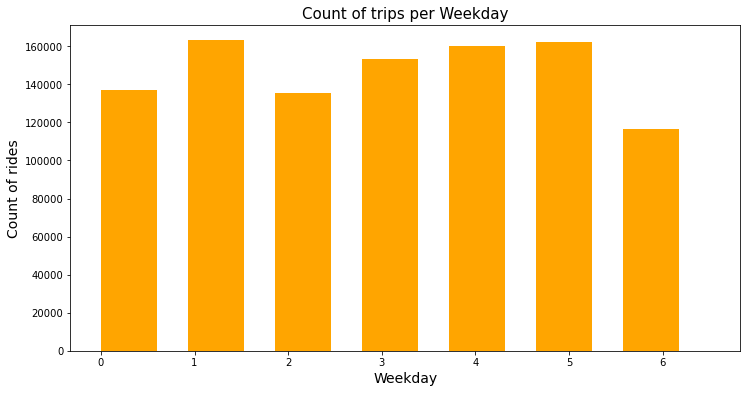

In [19]:
#Visualize the count of rides per weekday
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(df['Weekday'], width= 0.6, range= (0, 6.5), bins=7, color= "orange")
plt.title("Count of trips per Weekday", fontsize=15)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Count of rides", fontsize=14)

Text(0, 0.5, 'Count of rides')

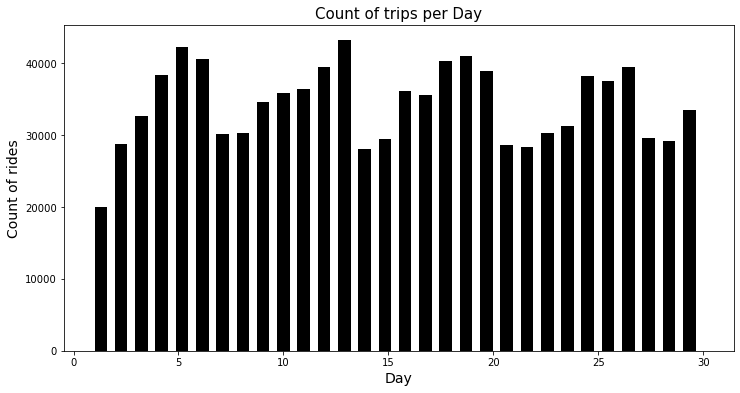

In [20]:
#Visualize the count of rides per Day of month
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(df['Day'], width= 0.6, bins= 30, color ='black')
plt.title("Count of trips per Day", fontsize=15)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Count of rides", fontsize=14)

Text(0, 0.5, 'Count of rides')

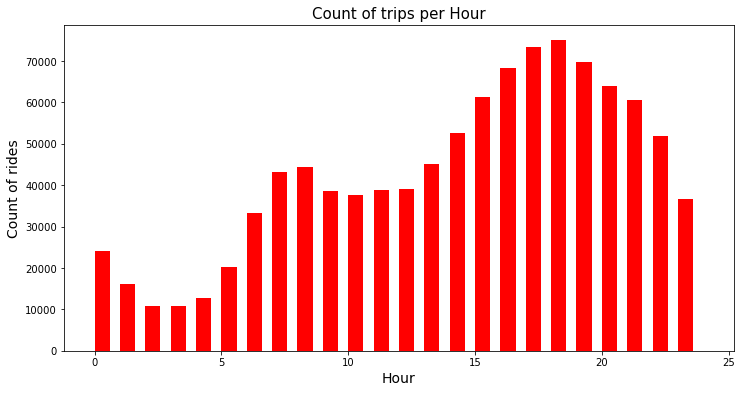

In [21]:
#Visualize the count of rides per hour
fig = plt.figure(figsize = (12,6))
plt.hist(df['Hour'], width= 0.6, range=(0,24), bins= 24, color ='red')
plt.title("Count of trips per Hour", fontsize=15)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Count of rides", fontsize=14)

Highest ride in the 18th hour that is 6pm

Text(0, 0.5, 'Count of rides')

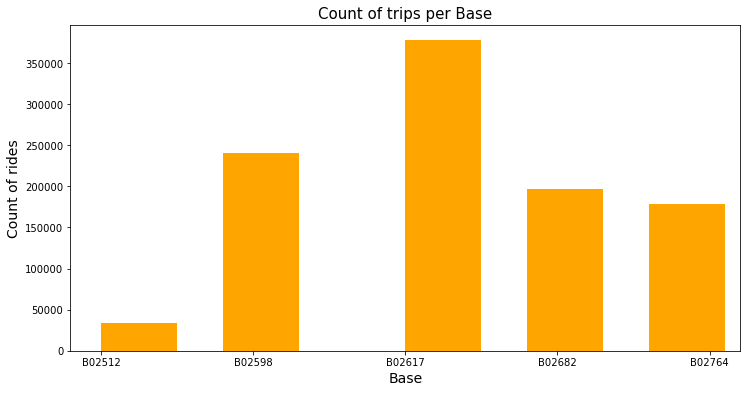

In [22]:
#Visualize the count of rides per base
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(df['Base'], width= 0.5, color= "orange")
plt.title("Count of trips per Base", fontsize=15)
plt.xlabel("Base", fontsize=14)
plt.ylabel("Count of rides", fontsize=14)

# Using seaborn for visualisation

<AxesSubplot:xlabel='Weekday', ylabel='Count'>

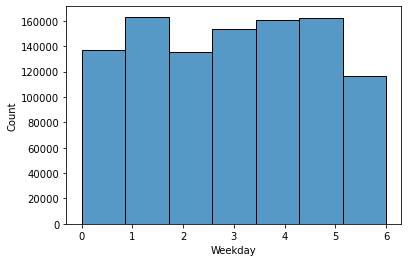

In [23]:
#Histogram for week day
sns.histplot(data = df, x = 'Weekday', bins = 7, shrink =1) #binwidth kde=True

<AxesSubplot:xlabel='Count', ylabel='Day'>

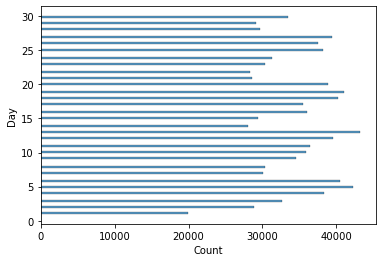

In [24]:
#Histogram for Day
sns.histplot(data = df, y = 'Day', shrink = 1)

<AxesSubplot:xlabel='Hour', ylabel='Count'>

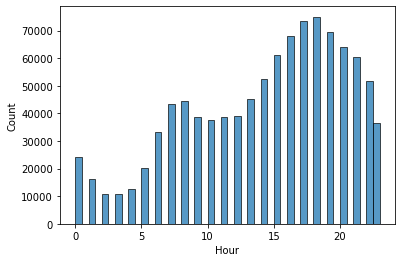

In [25]:
#Histogram for hours
sns.histplot(data = df, x = 'Hour', binwidth = 0.5)

<AxesSubplot:xlabel='Base', ylabel='Count'>

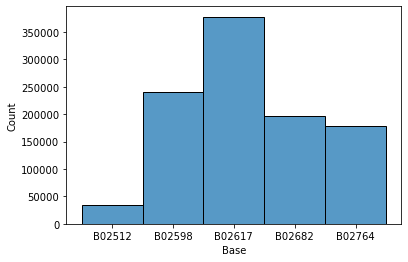

In [26]:
sns.histplot(data = df, x = 'Base')

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

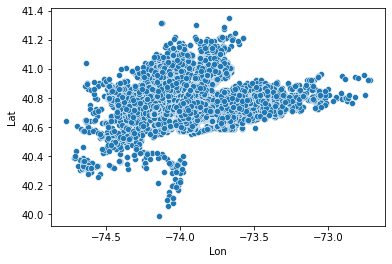

In [33]:
sns.scatterplot(data = df, x = 'Lon', y = 'Lat')

<Figure size 2160x1080 with 0 Axes>

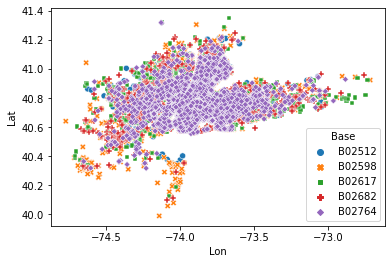

<Figure size 2160x1080 with 0 Axes>

In [46]:
sns.scatterplot(data = df, x = 'Lon', y = 'Lat', hue = 'Base', style = 'Base') #hue is like legend
plt.figure(figsize = (30,15))

<Figure size 2160x1080 with 0 Axes>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


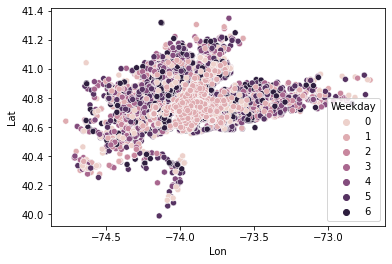

<Figure size 2160x1080 with 0 Axes>

In [47]:
sns.scatterplot(data = df, x = 'Lon', y = 'Lat', hue = 'Weekday')
plt.figure(figsize = (30,15))                                                                     

Text(0, 0.5, 'Lat')

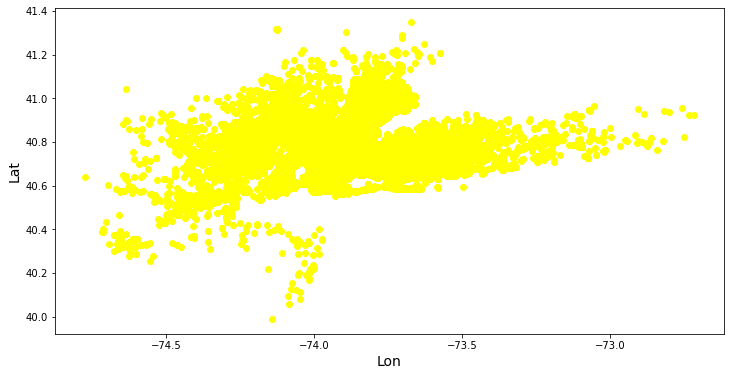

In [43]:
#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= df['Lon']
y= df['Lat']
plt.scatter(x, y, color= "yellow")
plt.xlabel("Lon", fontsize=14)
plt.ylabel("Lat", fontsize=14)